In [1]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
# load data

data = pd.read_csv('dataset/people.csv', header=0)
data['datetime']= to_datetime(data['datetime'])

Importing plotly failed. Interactive plots will not work.


In [2]:
data.head()

,datetime,zone1,zone2,zone3,zone4
0,2020-12-15 22:01:44,0,2,0,3
1,2020-12-15 22:03:32,0,0,0,3
2,2020-12-15 22:05:09,0,0,0,4
3,2020-12-15 22:06:45,0,0,0,4
4,2020-12-15 22:08:15,0,0,0,2


In [3]:
df = pd.DataFrame()
df['ds']= to_datetime(data['datetime'])
df['y'] = data['zone1']

In [4]:
df

,ds,y
0,2020-12-15 22:01:44,0
1,2020-12-15 22:03:32,0
2,2020-12-15 22:05:09,0
3,2020-12-15 22:06:45,0
4,2020-12-15 22:08:15,0
...,...,...
3624,2021-01-11 09:40:12,2
3625,2021-01-11 09:41:50,0
3626,2021-01-11 09:43:09,0
3627,2021-01-11 10:17:42,0


In [5]:
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
Ans = model.predict(df)

In [7]:
Ans['yhat'] = Ans['yhat'].round()

In [8]:
df = df.set_index('ds')
_h = 20
_d = _h*24
_w = _d*7
Last = df.index[-1]
Last

Timestamp('2021-01-11 10:25:02')

In [9]:
mm = pd.DataFrame(pd.date_range(Last, freq='1min', periods= len(Ans)))
# mm.set_index(0, inplace = True)
mm['yhat'] = Ans['yhat']

In [10]:
mm = mm.groupby(pd.Grouper(freq='5T',key=0)).mean().round()
mm

,yhat
0,
2021-01-11 10:25:00,1.0
2021-01-11 10:30:00,0.0
2021-01-11 10:35:00,0.0
2021-01-11 10:40:00,0.0
2021-01-11 10:45:00,0.0
...,...
2021-01-13 22:30:00,-0.0
2021-01-13 22:35:00,-1.0
2021-01-13 22:40:00,-1.0


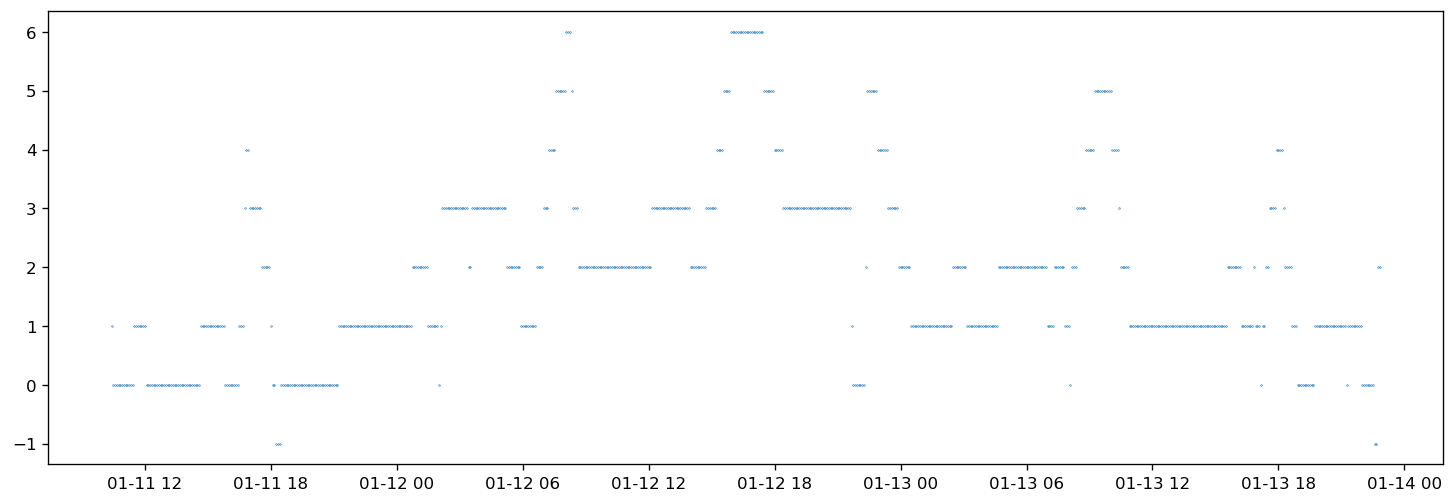

In [12]:
plt.rcParams.update({'figure.figsize': (15, 5), 'figure.dpi': 120})
plt.scatter(mm.index, mm['yhat'], s= 0.1)